In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [139]:
boost_df = pd.read_csv('data/boost_df.csv')

In [3]:
boost_df.head()

,trip_id,timestamp,boost_number,boost_amount,base_plus_boost,claimed,total_price,base_price,total_driver_supply,metro_area,trip_start_date
0,1,2022-12-30 12:00:00,0,0.00,10.00,0,10.00,10.0,202,SFO,2023-01-01 00:00:00
1,1,2022-12-30 12:05:00,1,1.76,11.76,0,11.76,10.0,263,SFO,2023-01-01 00:00:00
2,1,2022-12-30 12:10:00,2,2.04,12.04,0,13.80,10.0,203,SFO,2023-01-01 00:00:00
3,1,2022-12-30 12:15:00,3,1.78,11.78,1,15.58,10.0,201,SFO,2023-01-01 00:00:00
4,2,2022-12-30 13:00:00,0,0.00,35.00,0,35.00,35.0,242,ATL,2023-01-01 01:00:00


In [4]:
boost_df

,trip_id,timestamp,boost_number,boost_amount,base_plus_boost,claimed,total_price,base_price,total_driver_supply,metro_area,trip_start_date
0,1,2022-12-30 12:00:00,0,0.00,10.00,0,10.00,10.0,202,SFO,2023-01-01 00:00:00
1,1,2022-12-30 12:05:00,1,1.76,11.76,0,11.76,10.0,263,SFO,2023-01-01 00:00:00
2,1,2022-12-30 12:10:00,2,2.04,12.04,0,13.80,10.0,203,SFO,2023-01-01 00:00:00
3,1,2022-12-30 12:15:00,3,1.78,11.78,1,15.58,10.0,201,SFO,2023-01-01 00:00:00
4,2,2022-12-30 13:00:00,0,0.00,35.00,0,35.00,35.0,242,ATL,2023-01-01 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...
119830,19999,2025-04-11 18:05:00,1,1.75,36.75,1,36.75,35.0,234,SFO,2025-04-13 06:00:00
119831,20000,2025-04-11 19:00:00,0,0.00,14.00,0,14.00,14.0,183,MSP,2025-04-13 07:00:00
119832,20000,2025-04-11 19:05:00,1,1.83,15.83,0,15.83,14.0,172,MSP,2025-04-13 07:00:00
119833,20000,2025-04-11 19:10:00,2,1.81,15.81,0,17.64,14.0,193,MSP,2025-04-13 07:00:00


In [ ]:
# Does driver supply matter?
# number of boosts per metro area
# day of the week?
# look at timestamp or trip start date? 2 days apart... 
# # OH - the timestamp is when the ride is posted and boosted, and the start date is when it will happen
# why would base plus boost matter? total price seems more important
# look at total increase or percentage increase from base price

# are drivers choosing from other rides?
# does day of week or time of day matter? the trip start date seems to be dummy...
# would like to check out seasonality, maybe weather

In [5]:
boost_df.metro_area.unique()

array(['SFO', 'ATL', 'LAS', 'STL', 'TPA', 'NYC', 'DET', 'MSP', 'PDX',
       'DEN', 'MCL', 'LAX', 'SDF', 'DFW'], dtype=object)

In [8]:
boost_df[['trip_id', 'boost_number', 'metro_area']].groupby('trip_id').max().groupby('metro_area').mean()

,boost_number
metro_area,
ATL,5.082445
DEN,4.951773
DET,5.094822
DFW,5.109851
LAS,4.889706
LAX,4.994173
MCL,5.045175
MSP,4.839185
NYC,4.989422


In [9]:
# Close to 5 boosts, on average, for each metro area

In [18]:
boost_df['total_boost_amount'] = boost_df['total_price']-boost_df['base_price']

In [12]:
boost_df[['trip_id', 'total_boost_amount', 'metro_area']].groupby('trip_id').max().groupby('metro_area').mean()

,total_boost_amount
metro_area,
ATL,8.636482
DEN,9.419993
DET,10.211937
DFW,9.285684
LAS,10.620241
LAX,7.897014
MCL,9.897687
MSP,8.884038
NYC,8.681961


In [29]:
boost_df[['trip_id', 'total_boost_amount', 'metro_area']].groupby('trip_id').max().groupby('metro_area').max()

,total_boost_amount
metro_area,
ATL,17.99
DEN,21.38
DET,23.65
DFW,19.63
LAS,25.38
LAX,16.32
MCL,22.65
MSP,20.95
NYC,18.88


In [20]:
# Convert the timestamp column to datetime
boost_df['tsd_timestamp'] = pd.to_datetime(boost_df['trip_start_date'])

# Extract the day of the week as an integer (Monday=0, Sunday=6)
boost_df['day_of_week'] = boost_df['tsd_timestamp'].dt.dayofweek

In [21]:
boost_df

,trip_id,timestamp,boost_number,boost_amount,base_plus_boost,claimed,total_price,base_price,total_driver_supply,metro_area,trip_start_date,total_boost_amount,tsd_timestamp,day_of_week
0,1,2022-12-30 12:00:00,0,0.00,10.00,0,10.00,10.0,202,SFO,2023-01-01 00:00:00,0.00,2023-01-01 00:00:00,6
1,1,2022-12-30 12:05:00,1,1.76,11.76,0,11.76,10.0,263,SFO,2023-01-01 00:00:00,1.76,2023-01-01 00:00:00,6
2,1,2022-12-30 12:10:00,2,2.04,12.04,0,13.80,10.0,203,SFO,2023-01-01 00:00:00,3.80,2023-01-01 00:00:00,6
3,1,2022-12-30 12:15:00,3,1.78,11.78,1,15.58,10.0,201,SFO,2023-01-01 00:00:00,5.58,2023-01-01 00:00:00,6
4,2,2022-12-30 13:00:00,0,0.00,35.00,0,35.00,35.0,242,ATL,2023-01-01 01:00:00,0.00,2023-01-01 01:00:00,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119830,19999,2025-04-11 18:05:00,1,1.75,36.75,1,36.75,35.0,234,SFO,2025-04-13 06:00:00,1.75,2025-04-13 06:00:00,6
119831,20000,2025-04-11 19:00:00,0,0.00,14.00,0,14.00,14.0,183,MSP,2025-04-13 07:00:00,0.00,2025-04-13 07:00:00,6
119832,20000,2025-04-11 19:05:00,1,1.83,15.83,0,15.83,14.0,172,MSP,2025-04-13 07:00:00,1.83,2025-04-13 07:00:00,6
119833,20000,2025-04-11 19:10:00,2,1.81,15.81,0,17.64,14.0,193,MSP,2025-04-13 07:00:00,3.64,2025-04-13 07:00:00,6


In [23]:
# maybe offer a bonus for picking up rides within a certain amount of time that would be lower than the average total price increase

In [26]:
# NEXT STEPS:
# - get dummies for metro areas and day of the week, 
# - drop useless columns, 
# - see if anything is correlated to "claimed",
# - do some visualizations

In [43]:
no_boosts = boost_df.groupby('trip_id').count()[boost_df.groupby('trip_id').count()['timestamp']==1].index.tolist()

In [46]:
no_boost_trips_df = boost_df[boost_df['trip_id'].isin(no_boosts)]

In [47]:
model_df = boost_df[['boost_number', 'boost_amount', 'claimed', 'total_price', 'base_price', 'total_driver_supply', 'metro_area', 'total_boost_amount']]

In [50]:
model_df_1 = pd.get_dummies(model_df, dtype=int)

In [51]:
model_df_1

,boost_number,boost_amount,claimed,total_price,base_price,total_driver_supply,total_boost_amount,metro_area_ATL,metro_area_DEN,metro_area_DET,...,metro_area_LAS,metro_area_LAX,metro_area_MCL,metro_area_MSP,metro_area_NYC,metro_area_PDX,metro_area_SDF,metro_area_SFO,metro_area_STL,metro_area_TPA
0,0,0.00,0,10.00,10.0,202,0.00,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,1.76,0,11.76,10.0,263,1.76,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2,2.04,0,13.80,10.0,203,3.80,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,1.78,1,15.58,10.0,201,5.58,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0.00,0,35.00,35.0,242,0.00,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119830,1,1.75,1,36.75,35.0,234,1.75,0,0,0,...,0,0,0,0,0,0,0,1,0,0
119831,0,0.00,0,14.00,14.0,183,0.00,0,0,0,...,0,0,0,1,0,0,0,0,0,0
119832,1,1.83,0,15.83,14.0,172,1.83,0,0,0,...,0,0,0,1,0,0,0,0,0,0
119833,2,1.81,0,17.64,14.0,193,3.64,0,0,0,...,0,0,0,1,0,0,0,0,0,0


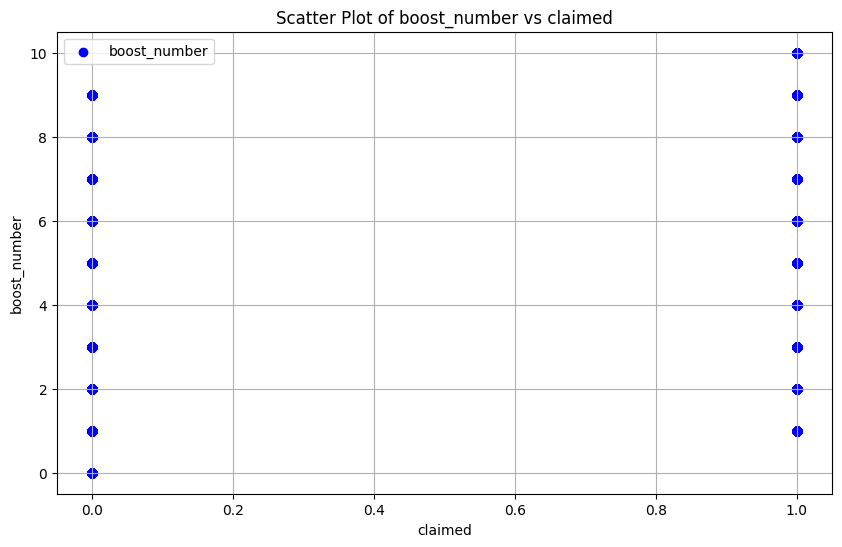

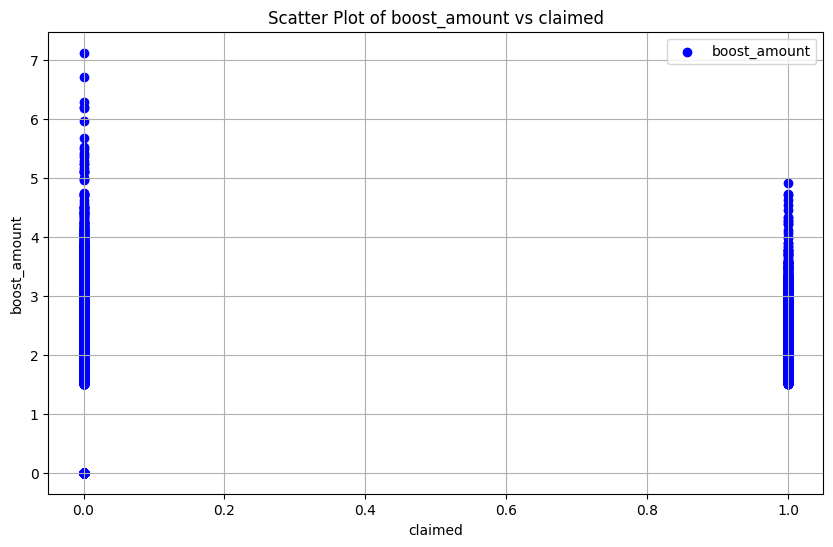

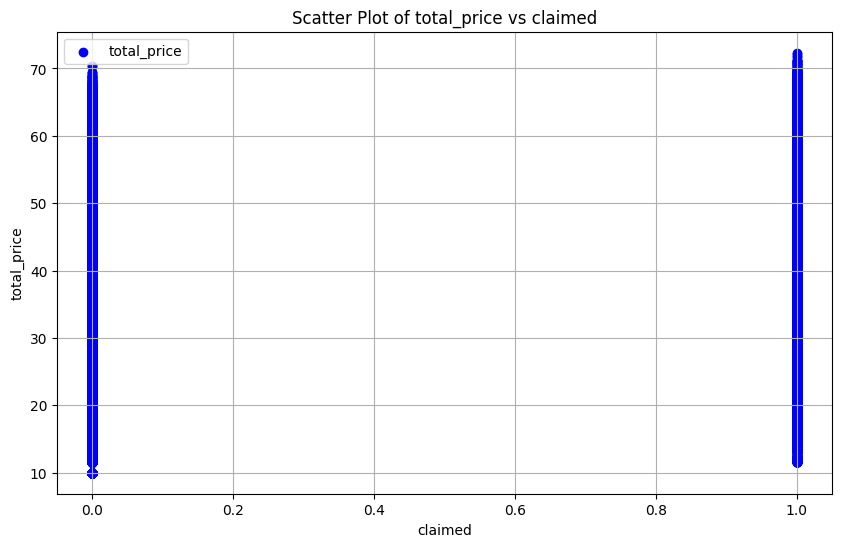

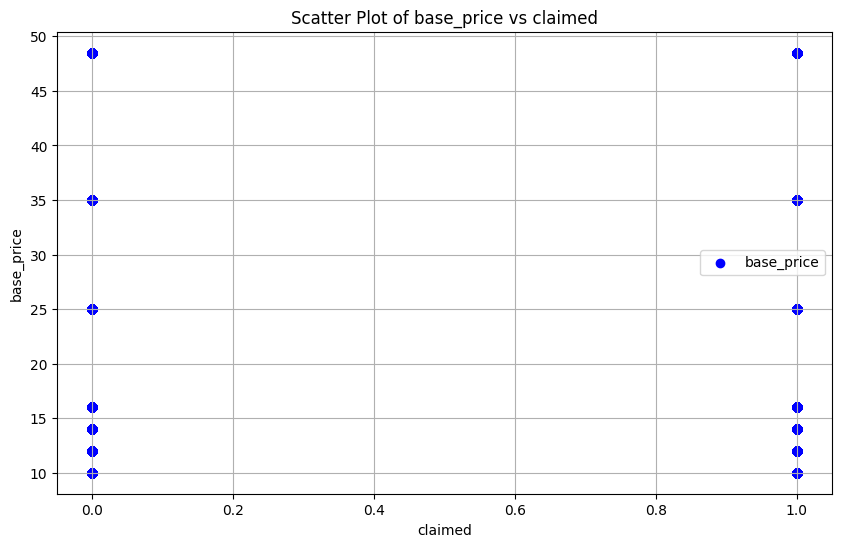

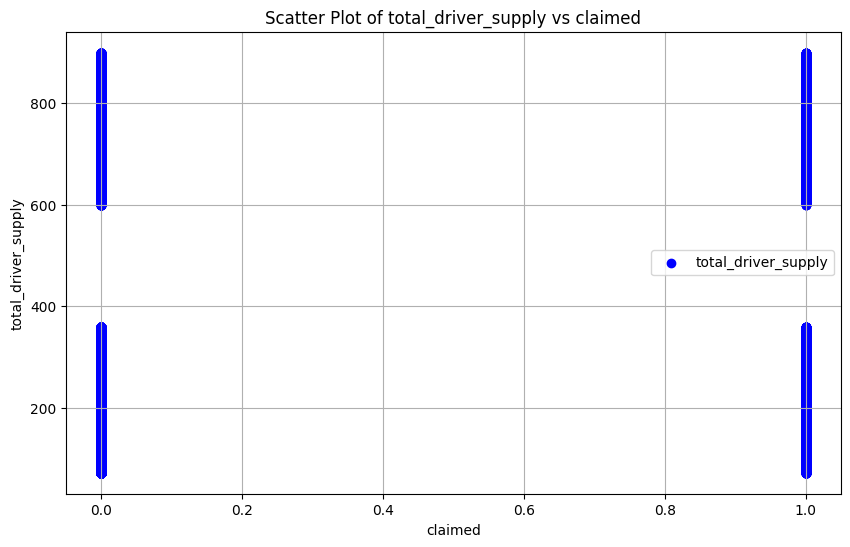

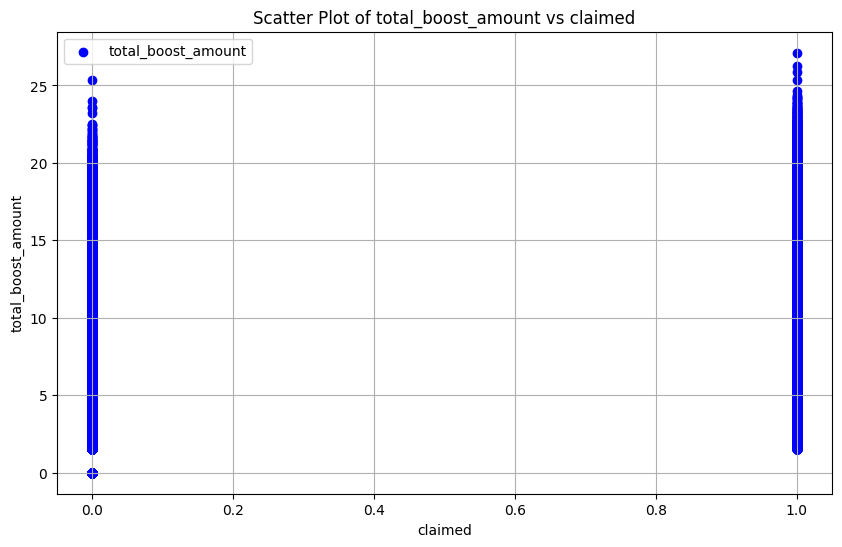

In [54]:
target = 'claimed'
features = [col for col in model_df_1.columns if (col != target and not col.startswith('metro'))]

for feature in features:
    plt.figure(figsize=(10, 6))
    plt.scatter(model_df_1[target], model_df_1[feature], color='blue', label=feature)
    plt.xlabel(target)
    plt.ylabel(feature)
    plt.title(f'Scatter Plot of {feature} vs {target}')
    plt.legend()
    plt.grid(True)
    plt.show()

In [55]:
claimed_df = model_df_1[model_df_1['claimed']==1]

In [61]:
len(claimed_df)

18122

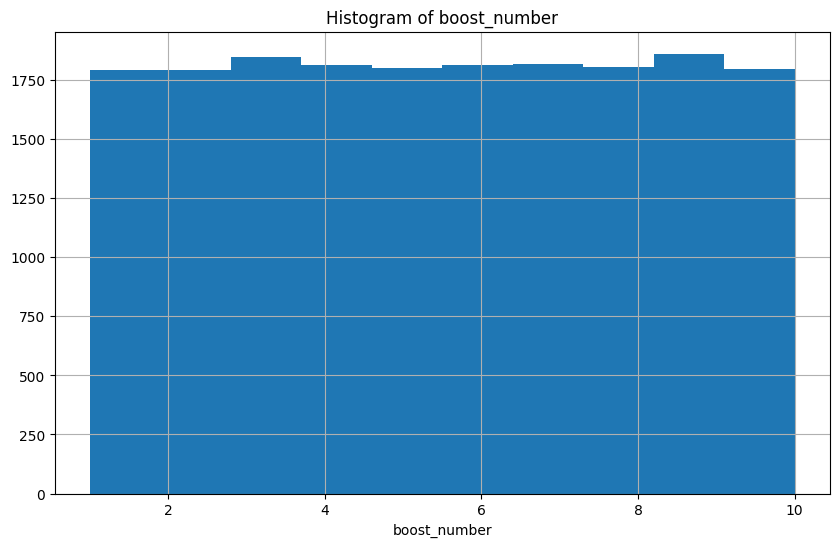

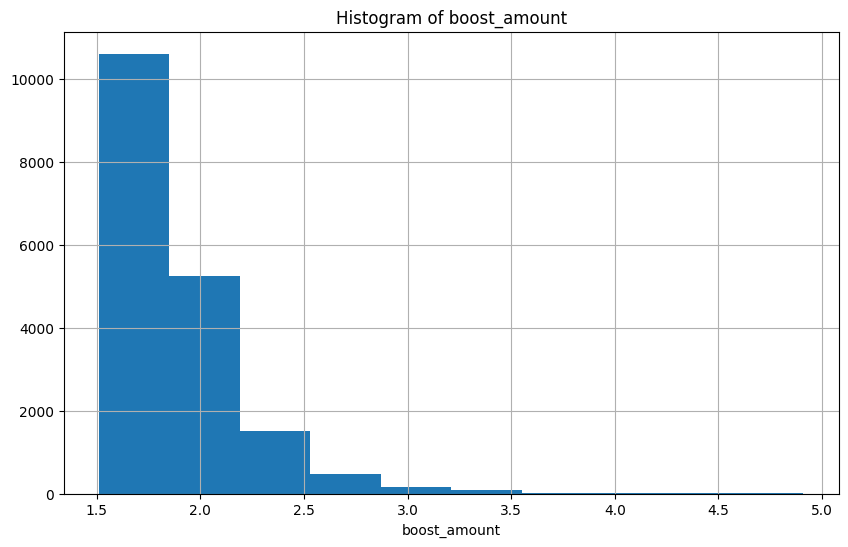

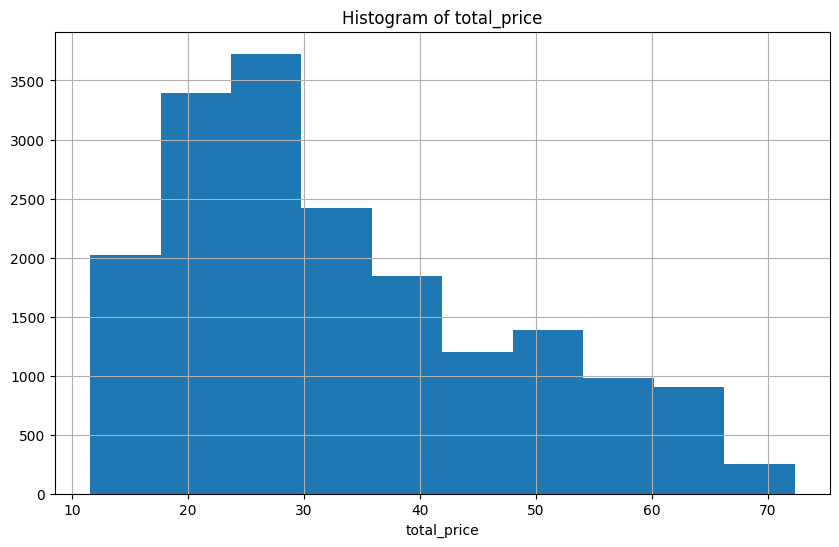

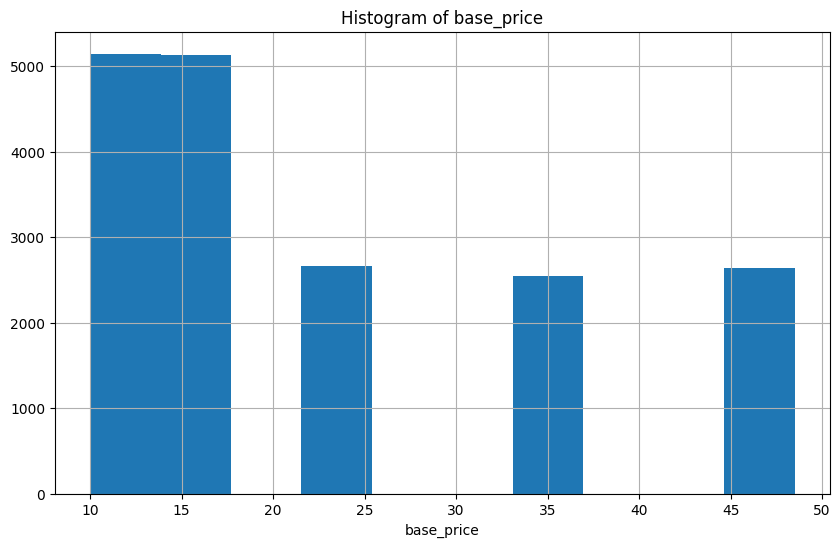

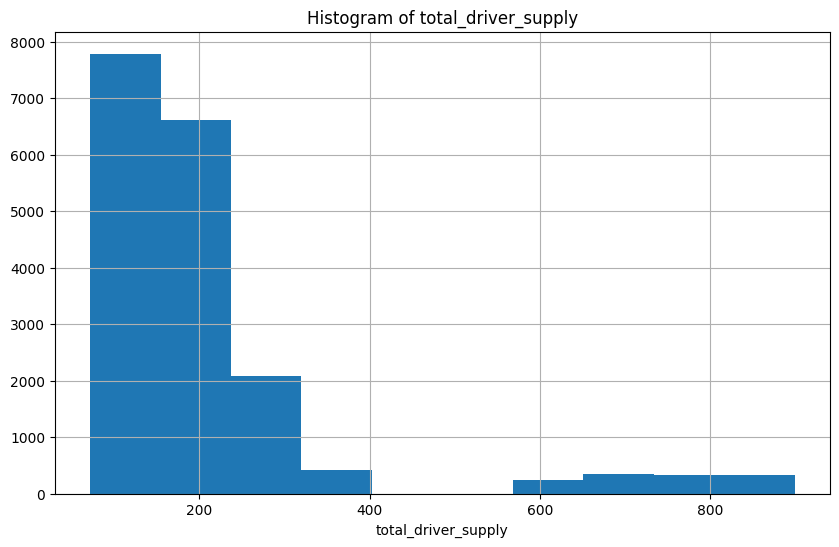

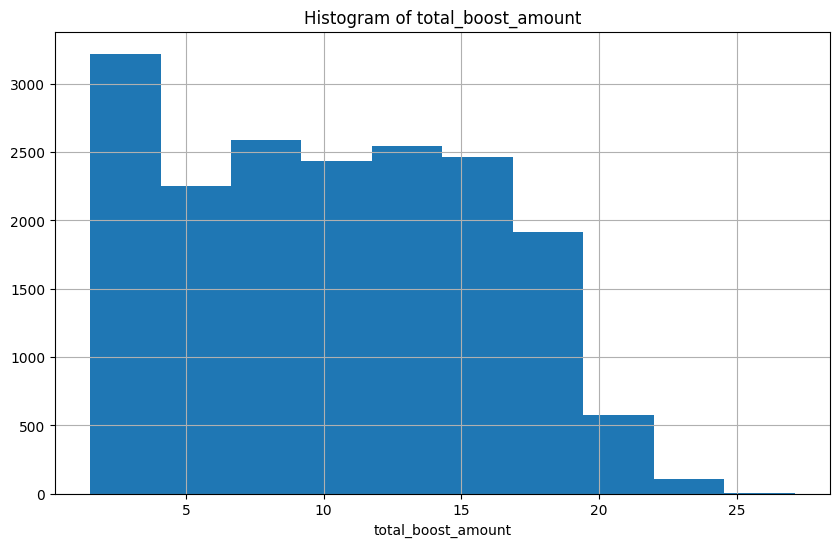

In [62]:
target = 'claimed'
features = [col for col in claimed_df.columns if (col != target and not col.startswith('metro'))]

for feature in features:
    plt.figure(figsize=(10, 6))
    plt.hist(claimed_df[feature])
    plt.xlabel(feature)
    plt.title(f'Histogram of {feature}')
    plt.grid(True)
    plt.show()

<Axes: >

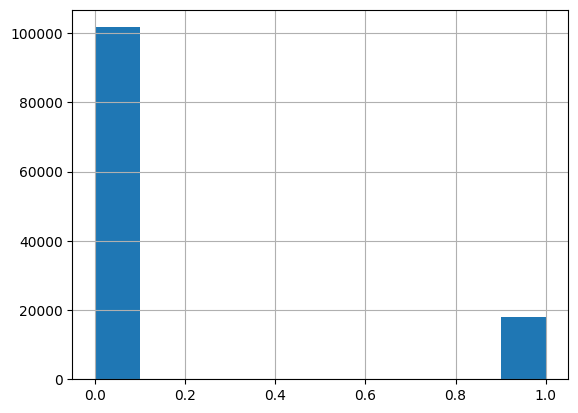

In [68]:
model_df_1['claimed'].hist()

<Axes: >

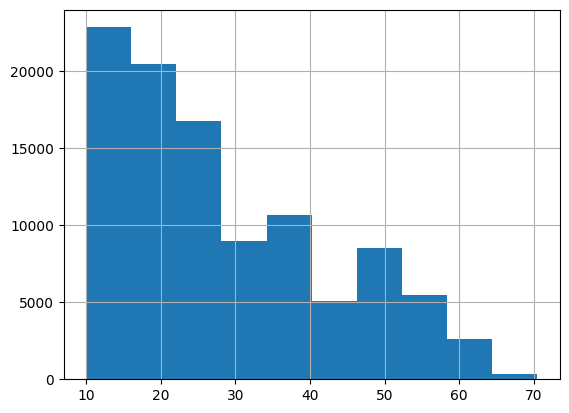

In [110]:
model_df_1[model_df_1['claimed']==0]['total_price'].hist()

In [123]:
model_df_1[model_df_1['claimed']==0]['total_price'].mean()

28.599687847177847

<Axes: >

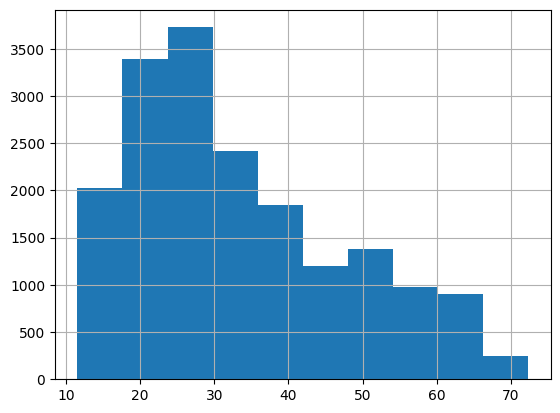

In [111]:
model_df_1[model_df_1['claimed']==1]['total_price'].hist()

In [124]:
model_df_1[model_df_1['claimed']==1]['total_price'].mean()

33.34225030349851

<Axes: >

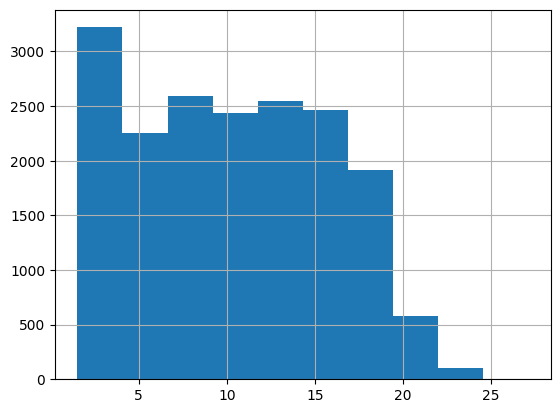

In [126]:
model_df_1[model_df_1['claimed']==1]['total_boost_amount'].hist()

In [125]:
model_df_1[model_df_1['claimed']==1]['total_boost_amount'].mean()

10.324674980686458

<Axes: >

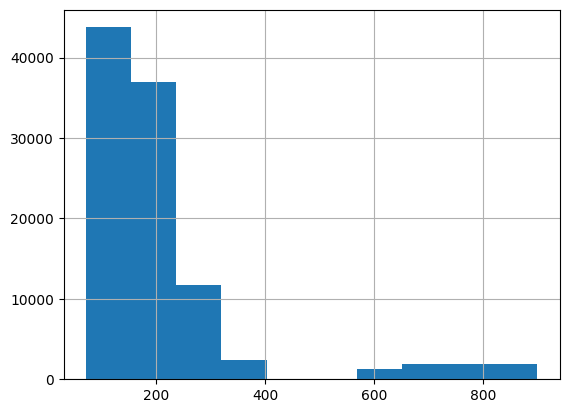

In [119]:
model_df_1[model_df_1['claimed']==0]['total_driver_supply'].hist()

<Axes: >

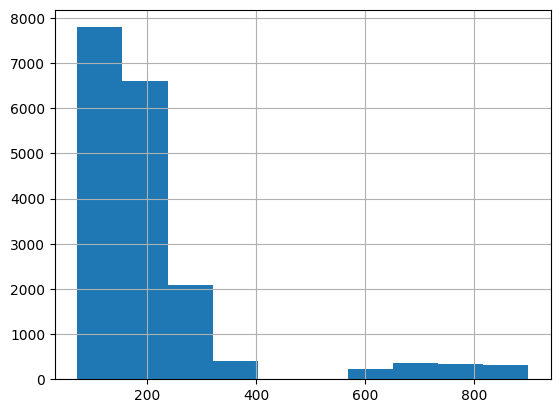

In [120]:
model_df_1[model_df_1['claimed']==1]['total_driver_supply'].hist()

In [114]:
import seaborn as sns

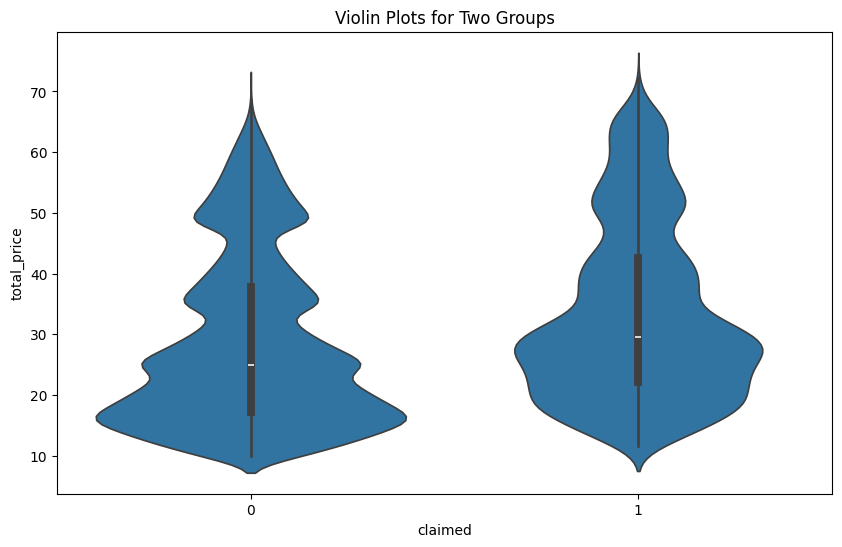

In [117]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='claimed', y='total_price', data=model_df_1[['claimed', 'total_price']])

# Customize the plot
plt.title('Violin Plots for Two Groups')
plt.show()

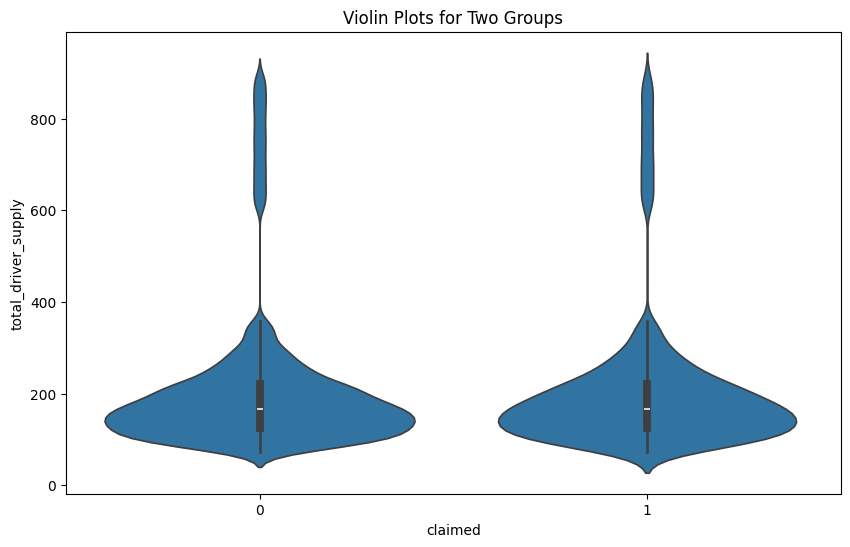

In [122]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='claimed', y='total_driver_supply', data=model_df_1[['claimed', 'total_driver_supply']])

# Customize the plot
plt.title('Violin Plots for Two Groups')
plt.show()

In [72]:
len(model_df_1[model_df_1['claimed']==1])

18122

In [73]:
len(model_df_1[model_df_1['claimed']==0])

101713

In [74]:
len(model_df_1[model_df_1['claimed']==1])/len(model_df_1)

0.15122460049234365

In [75]:
# balance data!!! - only 15% positive class

In [77]:
from sklearn.ensemble import RandomForestClassifier

# Example usage
# Create a RandomForestClassifier instance
rf_clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Example data (replace with your actual data)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load example dataset
X = model_df_1.drop('claimed', axis=1)
y = model_df_1.claimed

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the model
rf_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.85


In [79]:
results_df = X_test.copy()

In [80]:
results_df['prediction'] = y_pred

In [118]:
results_df.join(model_df_1[['claimed']], how='left')

,boost_number,boost_amount,total_price,base_price,total_driver_supply,total_boost_amount,metro_area_ATL,metro_area_DEN,metro_area_DET,metro_area_DFW,...,metro_area_MCL,metro_area_MSP,metro_area_NYC,metro_area_PDX,metro_area_SDF,metro_area_SFO,metro_area_STL,metro_area_TPA,prediction,claimed
201,1,1.82,11.82,10.0,123,1.82,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
66022,8,1.75,40.18,25.0,165,15.18,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
91971,0,0.00,25.00,25.0,120,0.00,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
17437,2,1.94,17.82,14.0,221,3.82,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
23282,6,1.67,35.51,25.0,231,10.51,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84461,1,1.62,26.62,25.0,159,1.62,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
23158,1,1.71,36.71,35.0,212,1.71,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
42277,5,1.62,57.24,48.5,198,8.74,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
37811,3,1.85,19.67,14.0,87,5.67,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# combine each trip into one row with number of times boosted and total boosted amount?
# predict whether claimed or not? doesn't seem useful
# predict number of boosts or total price when claimed? don't think we have enough data from before boosts to do that...
# need more data on why people aren't picking up rides - because they didn't see it? because it's a long or far away ride? because of snow? because of level of special needs?
# are people waiting because they know it will be more money?
# just start with highest price and decrease?
# picking up rides sooner may sane the company money because of less intervention from other teams but also happier (returning) customers - how much more can we pay up front to make that even out?
# A/B test to try out different boosting structures

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


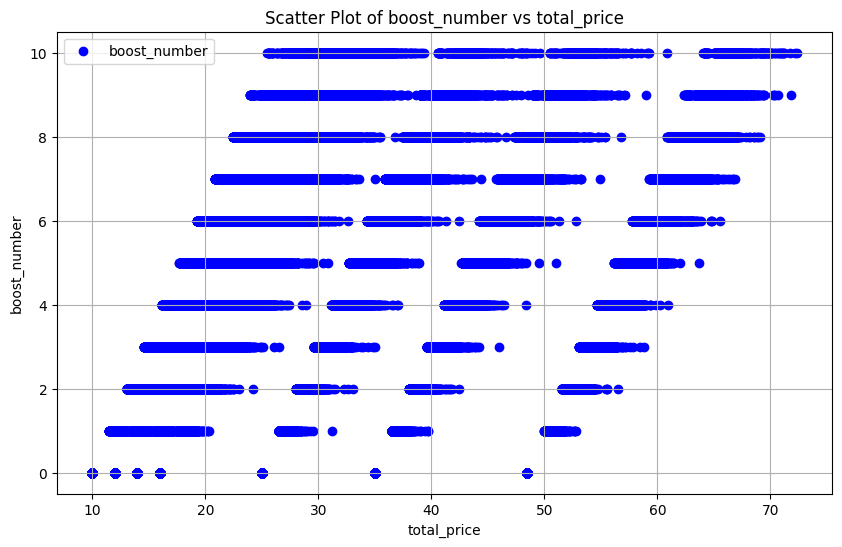

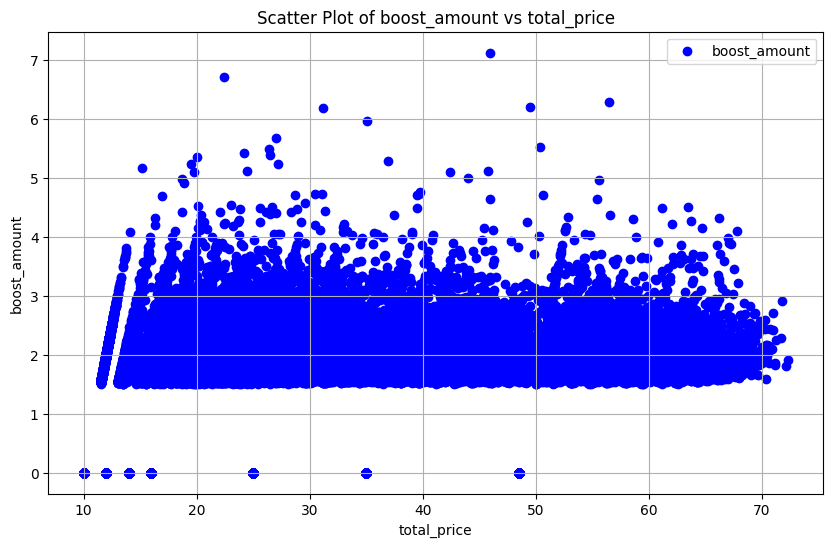

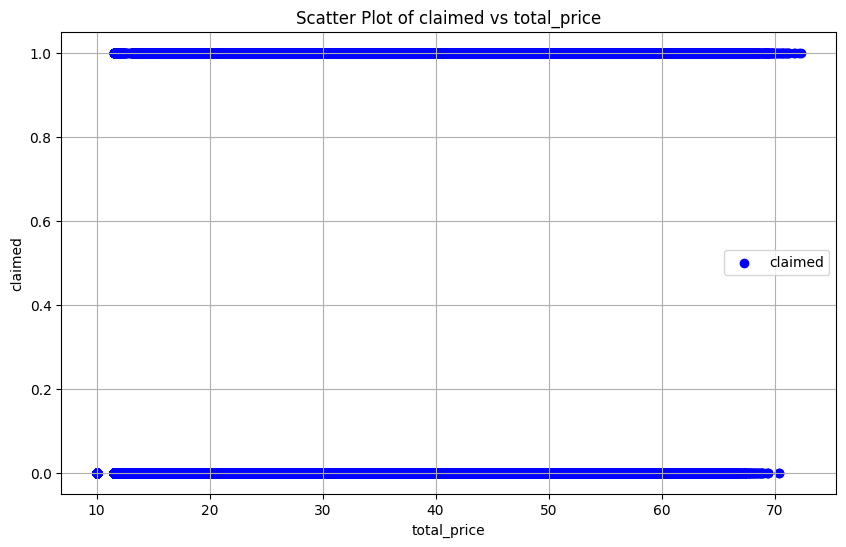

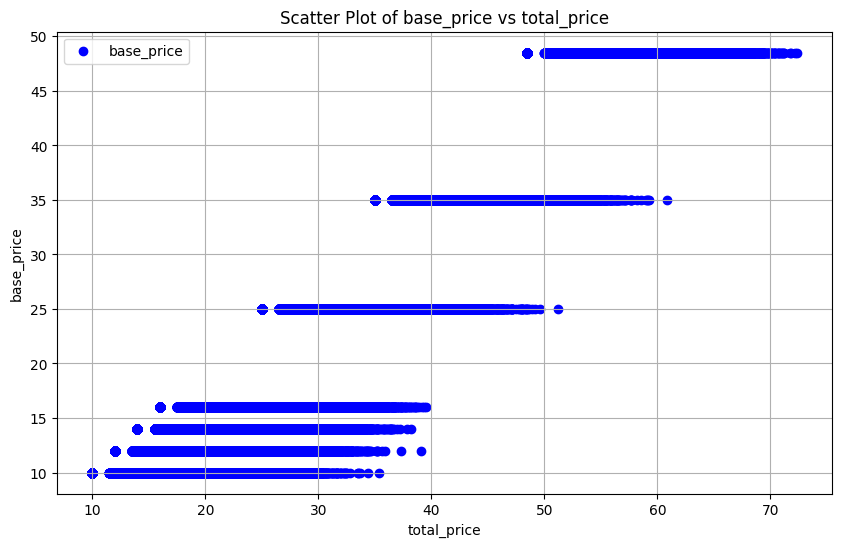

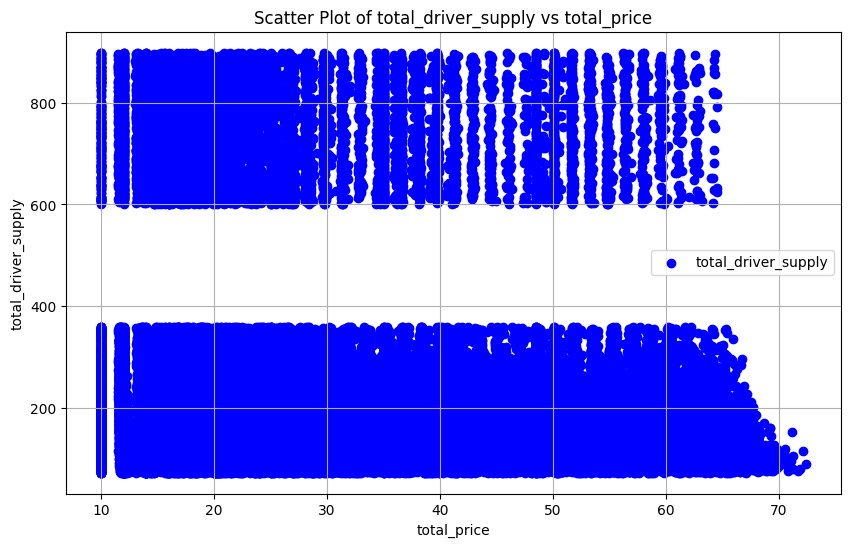

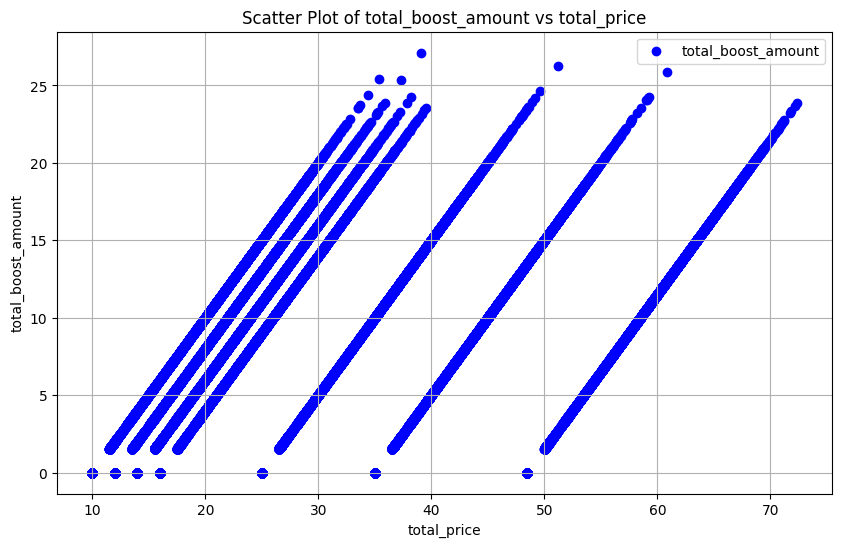

In [82]:
target = 'total_price'
features = [col for col in model_df_1.columns if (col != target and not col.startswith('metro'))]

for feature in features:
    plt.figure(figsize=(10, 6))
    plt.scatter(model_df_1[target], model_df_1[feature], color='blue', label=feature)
    plt.xlabel(target)
    plt.ylabel(feature)
    plt.title(f'Scatter Plot of {feature} vs {target}')
    plt.legend()
    plt.grid(True)
    plt.show()

In [83]:
# BIG challenge with this data is not being able to use performance as a tool for improvement
# if a model isn't performing well, i can't say if it's a bad approach or if it's just the synthetic data

In [84]:
# I would want to do an A/B test to figure out if my proposed boosting actually is better than the current method

In [127]:
boost_df_by_trip = boost_df[['trip_id', 
                             'boost_number',
                             'boost_amount',
                             'total_boost_amount', 
                             'total_price', 'base_price', 
                             'total_driver_supply', 
                             'metro_area']].groupby('trip_id').agg({
        'boost_number': 'max',
        'boost_amount': 'mean',
        'total_boost_amount': 'max',
        'total_price': 'max',
        'base_price': 'max',
        'total_driver_supply': 'last',
        'metro_area': 'last' 
    })

In [128]:
boost_df_by_trip

,boost_number,boost_amount,total_boost_amount,total_price,base_price,total_driver_supply,metro_area
trip_id,,,,,,,
1,3,1.395000,5.58,15.58,10.0,201,SFO
2,6,1.445714,10.12,45.12,35.0,357,ATL
3,10,1.882727,20.71,34.71,14.0,81,LAS
4,3,1.420000,5.68,30.68,25.0,126,STL
5,5,1.608333,9.65,58.15,48.5,175,TPA
...,...,...,...,...,...,...,...
19996,2,1.270000,3.81,13.81,10.0,146,MSP
19997,3,1.275000,5.10,17.10,12.0,291,NYC
19998,2,1.246667,3.74,15.74,12.0,164,DEN


In [98]:
boost_df_by_trip_dummies = pd.get_dummies(boost_df_by_trip, dtype=int)

In [99]:
boost_df_by_trip_dummies

,boost_number,total_boost_amount,total_price,base_price,total_driver_supply,metro_area_ATL,metro_area_DEN,metro_area_DET,metro_area_DFW,metro_area_LAS,metro_area_LAX,metro_area_MCL,metro_area_MSP,metro_area_NYC,metro_area_PDX,metro_area_SDF,metro_area_SFO,metro_area_STL,metro_area_TPA
trip_id,,,,,,,,,,,,,,,,,,,
1,3,5.58,15.58,10.0,201,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,6,10.12,45.12,35.0,357,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10,20.71,34.71,14.0,81,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,3,5.68,30.68,25.0,126,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,5,9.65,58.15,48.5,175,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,2,3.81,13.81,10.0,146,0,0,0,0,0,0,0,1,0,0,0,0,0,0
19997,3,5.10,17.10,12.0,291,0,0,0,0,0,0,0,0,1,0,0,0,0,0
19998,2,3.74,15.74,12.0,164,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [100]:
model_df_2 = boost_df_by_trip_dummies.drop(['total_boost_amount', 'total_price', 'total_driver_supply'], axis=1)

In [101]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Example data (replace with your actual data)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load example dataset
X = model_df_2.drop('boost_number', axis=1)
y = model_df_2.boost_number

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the model
rf_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 10.270258474148585
Root Mean Squared Error: 3.204724399094029


In [102]:
result_df_2 = X_test.copy()
result_df_2['prediction'] = y_pred
# result_df_2['actual]' = model_df_2

In [106]:
result_df_2.join(model_df_2[['boost_number']], how='left')

,base_price,metro_area_ATL,metro_area_DEN,metro_area_DET,metro_area_DFW,metro_area_LAS,metro_area_LAX,metro_area_MCL,metro_area_MSP,metro_area_NYC,metro_area_PDX,metro_area_SDF,metro_area_SFO,metro_area_STL,metro_area_TPA,prediction,boost_number
trip_id,,,,,,,,,,,,,,,,,
10651,35.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4.989140,6
2042,10.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,4.729087,10
8669,10.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,5.035274,4
1115,25.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5.255057,9
13903,10.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4.701425,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4465,14.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5.366722,0
15657,16.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5.422258,3
19147,14.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,5.341544,4


In [107]:
# average boost number is right around 5, so it's predicting close to that each time, since it doesn't have much to go on

In [129]:
# introduce a time series component like previous_boost_amount and previous_2_boost_amounts to capture changes over time
# if no boosts or only one boost, have a 0??

In [130]:
model_df_1

,boost_number,boost_amount,claimed,total_price,base_price,total_driver_supply,total_boost_amount,metro_area_ATL,metro_area_DEN,metro_area_DET,...,metro_area_LAS,metro_area_LAX,metro_area_MCL,metro_area_MSP,metro_area_NYC,metro_area_PDX,metro_area_SDF,metro_area_SFO,metro_area_STL,metro_area_TPA
0,0,0.00,0,10.00,10.0,202,0.00,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,1.76,0,11.76,10.0,263,1.76,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2,2.04,0,13.80,10.0,203,3.80,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,1.78,1,15.58,10.0,201,5.58,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0.00,0,35.00,35.0,242,0.00,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119830,1,1.75,1,36.75,35.0,234,1.75,0,0,0,...,0,0,0,0,0,0,0,1,0,0
119831,0,0.00,0,14.00,14.0,183,0.00,0,0,0,...,0,0,0,1,0,0,0,0,0,0
119832,1,1.83,0,15.83,14.0,172,1.83,0,0,0,...,0,0,0,1,0,0,0,0,0,0
119833,2,1.81,0,17.64,14.0,193,3.64,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [131]:
boost_df

,trip_id,timestamp,boost_number,boost_amount,base_plus_boost,claimed,total_price,base_price,total_driver_supply,metro_area,trip_start_date,total_boost_amount,tsd_timestamp,day_of_week
0,1,2022-12-30 12:00:00,0,0.00,10.00,0,10.00,10.0,202,SFO,2023-01-01 00:00:00,0.00,2023-01-01 00:00:00,6
1,1,2022-12-30 12:05:00,1,1.76,11.76,0,11.76,10.0,263,SFO,2023-01-01 00:00:00,1.76,2023-01-01 00:00:00,6
2,1,2022-12-30 12:10:00,2,2.04,12.04,0,13.80,10.0,203,SFO,2023-01-01 00:00:00,3.80,2023-01-01 00:00:00,6
3,1,2022-12-30 12:15:00,3,1.78,11.78,1,15.58,10.0,201,SFO,2023-01-01 00:00:00,5.58,2023-01-01 00:00:00,6
4,2,2022-12-30 13:00:00,0,0.00,35.00,0,35.00,35.0,242,ATL,2023-01-01 01:00:00,0.00,2023-01-01 01:00:00,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119830,19999,2025-04-11 18:05:00,1,1.75,36.75,1,36.75,35.0,234,SFO,2025-04-13 06:00:00,1.75,2025-04-13 06:00:00,6
119831,20000,2025-04-11 19:00:00,0,0.00,14.00,0,14.00,14.0,183,MSP,2025-04-13 07:00:00,0.00,2025-04-13 07:00:00,6
119832,20000,2025-04-11 19:05:00,1,1.83,15.83,0,15.83,14.0,172,MSP,2025-04-13 07:00:00,1.83,2025-04-13 07:00:00,6
119833,20000,2025-04-11 19:10:00,2,1.81,15.81,0,17.64,14.0,193,MSP,2025-04-13 07:00:00,3.64,2025-04-13 07:00:00,6


In [134]:
boost_df['time_before_trip'] = pd.to_datetime(boost_df['trip_start_date'])-pd.to_datetime(boost_df['timestamp'])

In [135]:
boost_df['time_before_trip']

0        1 days 12:00:00
1        1 days 11:55:00
2        1 days 11:50:00
3        1 days 11:45:00
4        1 days 12:00:00
               ...      
119830   1 days 11:55:00
119831   1 days 12:00:00
119832   1 days 11:55:00
119833   1 days 11:50:00
119834   1 days 11:45:00
Name: time_before_trip, Length: 119835, dtype: timedelta64[ns]

COLUMNS:
- trip day of week
- trip time of day
- time posted before trip
- time until claimed
- number of boosts (potential target)
- initial boost amount
- penultimate boost amount
- final boost amount
- total boost amount
- base price
- total price (potential target)
- initial driver supply
- penultimate driver supply
- final driver supply
- metro area

In [140]:
boost_df.columns

Index(['trip_id', 'timestamp', 'boost_number', 'boost_amount',
       'base_plus_boost', 'claimed', 'total_price', 'base_price',
       'total_driver_supply', 'metro_area', 'trip_start_date'],
      dtype='object')

In [162]:
# DATA TRANSFORMATIONS

In [189]:
boost_df_by_trip = boost_df.groupby('trip_id').agg({
    'timestamp': list,
    'boost_number': 'max',
    'boost_amount': list,
    'total_price': 'max',
    'base_price': 'max',
    'total_driver_supply': list,
    'metro_area': 'last',
    'trip_start_date': 'last'
})

In [190]:
boost_df_by_trip['ride_posted_date'] = boost_df_by_trip['timestamp'].map(lambda x: x[0])
boost_df_by_trip['last_boost'] = boost_df_by_trip['timestamp'].map(lambda x: x[-1] if len(x)>1 else x[0])
boost_df_by_trip['first_boost_amount'] = boost_df_by_trip['boost_amount'].map(lambda x: x[0])
boost_df_by_trip['penultimate_boost_amount'] = boost_df_by_trip['boost_amount'].map(lambda x: x[-2] if len(x)>1 else x[0])
boost_df_by_trip['last_boost_amount'] = boost_df_by_trip['boost_amount'].map(lambda x: x[-1] if len(x)>1 else x[0])
boost_df_by_trip['original_driver_supply'] = boost_df_by_trip['total_driver_supply'].map(lambda x: x[0])
boost_df_by_trip['penultimate_driver_supply'] = boost_df_by_trip['total_driver_supply'].map(lambda x: x[-2] if len(x)>1 else x[0])
boost_df_by_trip['last_driver_supply'] = boost_df_by_trip['total_driver_supply'].map(lambda x: x[-1] if len(x)>1 else x[0])

In [191]:
# Convert to datetime
boost_df_by_trip['ride_posted_date'] = pd.to_datetime(boost_df_by_trip['ride_posted_date'])
boost_df_by_trip['last_boost'] = pd.to_datetime(boost_df_by_trip['last_boost'])
boost_df_by_trip['trip_start_date'] = pd.to_datetime(boost_df_by_trip['trip_start_date'])

# trip day of week
boost_df_by_trip['day_of_week'] = boost_df_by_trip['trip_start_date'].dt.dayofweek

# trip time of day
boost_df_by_trip['hour_of_day'] = boost_df_by_trip['trip_start_date'].dt.hour
boost_df_by_trip['hour_sin'] = np.sin(2 * np.pi * boost_df_by_trip['hour_of_day'] / 24)
boost_df_by_trip['hour_cos'] = np.cos(2 * np.pi * boost_df_by_trip['hour_of_day'] / 24)

# time posted before trip
boost_df_by_trip['time_to_ride_start'] = (boost_df_by_trip['trip_start_date'] - boost_df_by_trip['ride_posted_date']).dt.total_seconds() / 3600

# time until claimed
boost_df_by_trip['time_until_claimed'] = (boost_df_by_trip['last_boost'] - boost_df_by_trip['ride_posted_date']).dt.total_seconds() / 3600

# number of boosts (potential target)
boost_df_by_trip['boost_number']

# total boost amount
boost_df_by_trip['total_boost_amount'] = boost_df_by_trip['total_price'] - boost_df_by_trip['base_price']

# Handle categorical values
boost_df_by_trip = pd.get_dummies(boost_df_by_trip, columns=['metro_area', 'day_of_week'], drop_first=True, dtype=int)

# Drop columns used for transformations
boost_df_by_trip = boost_df_by_trip.drop(columns=[
    'timestamp', 
    'boost_amount', 
    'total_driver_supply', 
    'trip_start_date',
    'ride_posted_date',
    'last_boost',
    'hour_of_day'
])

In [155]:
boost_df_by_trip.columns

Index(['boost_number', 'total_price', 'base_price', 'first_boost_amount',
       'penultimate_boost_amount', 'last_boost_amount',
       'original_driver_supply', 'penultimate_driver_supply',
       'last_driver_supply', 'hour_sin', 'hour_cos', 'time_to_ride_start',
       'time_until_claimed', 'total_boost_amount', 'metro_area_DEN',
       'metro_area_DET', 'metro_area_DFW', 'metro_area_LAS', 'metro_area_LAX',
       'metro_area_MCL', 'metro_area_MSP', 'metro_area_NYC', 'metro_area_PDX',
       'metro_area_SDF', 'metro_area_SFO', 'metro_area_STL', 'metro_area_TPA',
       'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4',
       'day_of_week_5', 'day_of_week_6'],
      dtype='object')

In [161]:
boost_df_by_trip

,boost_number,total_price,base_price,first_boost_amount,penultimate_boost_amount,last_boost_amount,original_driver_supply,penultimate_driver_supply,last_driver_supply,hour_sin,...,metro_area_SDF,metro_area_SFO,metro_area_STL,metro_area_TPA,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
trip_id,,,,,,,,,,,,,,,,,,,,,
1,3,15.58,10.0,0.0,2.04,1.78,202,203,201,0.000000,...,0,1,0,0,0,0,0,0,0,1
2,6,45.12,35.0,0.0,1.67,1.68,242,248,357,0.258819,...,0,0,0,0,0,0,0,0,0,1
3,10,34.71,14.0,0.0,1.91,1.72,92,102,81,0.500000,...,0,0,0,0,0,0,0,0,0,1
4,3,30.68,25.0,0.0,2.02,1.96,144,138,126,0.707107,...,0,0,1,0,0,0,0,0,0,1
5,5,58.15,48.5,0.0,2.04,1.96,128,138,175,0.866025,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,2,13.81,10.0,0.0,1.60,2.21,214,152,146,0.707107,...,0,0,0,0,0,0,0,0,0,1
19997,3,17.10,12.0,0.0,1.70,1.72,243,295,291,0.866025,...,0,0,0,0,0,0,0,0,0,1
19998,2,15.74,12.0,0.0,1.79,1.95,165,134,164,0.965926,...,0,0,0,0,0,0,0,0,0,1


In [183]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

boost_df_by_trip = boost_df_by_trip.drop('time_until_claimed', axis=1) # data leakage because each boost is 5 minutes
boost_df_by_trip = boost_df_by_trip.drop('total_boost_amount', axis=1) # data leakage because each boost is roughly the same amount
boost_df_by_trip = boost_df_by_trip.drop('total_price', axis=1) # this isn't known until the very end

X = boost_df_by_trip.drop('boost_number', axis=1)
y = boost_df_by_trip.boost_number

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the model
rf_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

results_df = X_test.copy()
results_df['pred_boost_number'] = y_pred
results_df['actual_boost_number'] = y_test

Mean Squared Error: 5.6702133
Root Mean Squared Error: 2.3812209683269634


In [184]:
results_df

,base_price,first_boost_amount,penultimate_boost_amount,last_boost_amount,original_driver_supply,penultimate_driver_supply,last_driver_supply,hour_sin,hour_cos,time_to_ride_start,...,metro_area_STL,metro_area_TPA,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,pred_boost_number,actual_boost_number
trip_id,,,,,,,,,,,,,,,,,,,,,
10651,35.0,0.0,1.60,1.54,311,299,358,-1.000000,-1.836970e-16,36.0,...,0,0,1,0,0,0,0,0,4.98,6
2042,10.0,0.0,1.91,2.26,140,116,110,0.258819,9.659258e-01,36.0,...,0,0,0,0,0,0,0,0,5.52,10
8669,10.0,0.0,1.65,1.62,842,833,742,0.866025,5.000000e-01,36.0,...,0,0,0,0,1,0,0,0,5.07,4
1115,25.0,0.0,1.92,1.71,110,118,111,0.500000,-8.660254e-01,36.0,...,0,0,0,0,1,0,0,0,6.67,9
13903,10.0,0.0,0.00,0.00,108,108,108,1.000000,6.123234e-17,36.0,...,0,0,0,0,0,1,0,0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4465,14.0,0.0,0.00,0.00,177,177,177,0.000000,1.000000e+00,36.0,...,0,1,0,0,1,0,0,0,0.00,0
15657,16.0,0.0,1.81,1.70,136,139,146,0.866025,-5.000000e-01,36.0,...,0,1,0,0,0,0,0,0,6.80,3
19147,14.0,0.0,1.93,1.76,228,184,207,-1.000000,-1.836970e-16,36.0,...,0,0,0,0,0,0,1,0,5.44,4


In [165]:
# data leakage, probably from time until claimed

In [185]:
feature_importances = rf_reg.feature_importances_

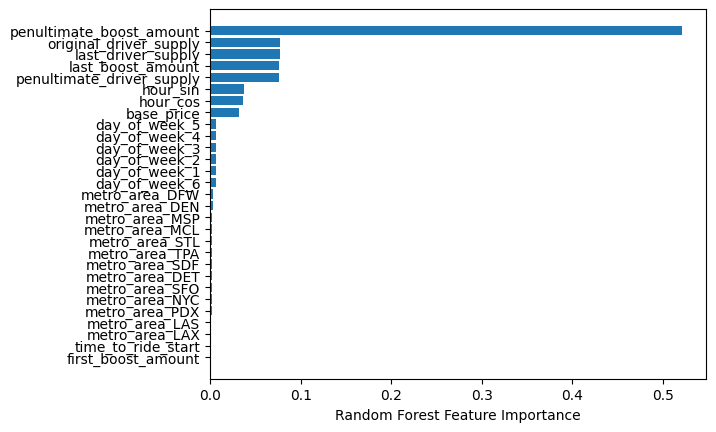

In [186]:
# Sort features by importance
sorted_idx = feature_importances.argsort()

# Create a bar chart
plt.barh(X.columns[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.show()

In [ ]:
# lots of features are giving it away because they happened after the fact
# how can we predict without using those "future" features?

In [ ]:
# Maybe normalize features (like driver supply)

In [ ]:
# A better way to do it could be to have a baseline model and a boost impact model
# First model without any boost info
# Second model, using the probability of the first model, to get a new likelihood
# Start with predicting likelihood within 3 boosts - can change this to see impact
# use boost info to figure out if this is likely

In [194]:
df_no_boost = boost_df_by_trip.copy()
df_no_boost = df_no_boost[['base_price',
                           'original_driver_supply', 
                           'hour_sin', 
                           'hour_cos', 
                           'time_to_ride_start',
                           'metro_area_DEN',
                           'metro_area_DET', 
                           'metro_area_DFW', 
                           'metro_area_LAS', 
                           'metro_area_LAX',
                           'metro_area_MCL', 
                           'metro_area_MSP', 
                           'metro_area_NYC', 
                           'metro_area_PDX',
                           'metro_area_SDF', 
                           'metro_area_SFO', 
                           'metro_area_STL', 
                           'metro_area_TPA',
                           'day_of_week_1', 
                           'day_of_week_2', 
                           'day_of_week_3', 
                           'day_of_week_4',
                           'day_of_week_5', 
                           'day_of_week_6',
                           'boost_number']]

In [195]:
df_no_boost

,base_price,original_driver_supply,hour_sin,hour_cos,time_to_ride_start,metro_area_DEN,metro_area_DET,metro_area_DFW,metro_area_LAS,metro_area_LAX,...,metro_area_SFO,metro_area_STL,metro_area_TPA,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,boost_number
trip_id,,,,,,,,,,,,,,,,,,,,,
1,10.0,202,0.000000,1.000000e+00,36.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,3
2,35.0,242,0.258819,9.659258e-01,36.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,6
3,14.0,92,0.500000,8.660254e-01,36.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,10
4,25.0,144,0.707107,7.071068e-01,36.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,3
5,48.5,128,0.866025,5.000000e-01,36.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,10.0,214,0.707107,7.071068e-01,36.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
19997,12.0,243,0.866025,5.000000e-01,36.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3
19998,12.0,165,0.965926,2.588190e-01,36.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2


In [196]:
df_no_boost['claimed_within_3'] = df_no_boost['boost_number'].apply(lambda x: 1 if x <= 3 else 0)

In [198]:
boost_number = df_no_boost['boost_number']

In [200]:
df_no_boost = df_no_boost.drop('boost_number', axis=1)

In [201]:
df_no_boost

,base_price,original_driver_supply,hour_sin,hour_cos,time_to_ride_start,metro_area_DEN,metro_area_DET,metro_area_DFW,metro_area_LAS,metro_area_LAX,...,metro_area_SFO,metro_area_STL,metro_area_TPA,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,claimed_within_3
trip_id,,,,,,,,,,,,,,,,,,,,,
1,10.0,202,0.000000,1.000000e+00,36.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
2,35.0,242,0.258819,9.659258e-01,36.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,14.0,92,0.500000,8.660254e-01,36.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,25.0,144,0.707107,7.071068e-01,36.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
5,48.5,128,0.866025,5.000000e-01,36.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,10.0,214,0.707107,7.071068e-01,36.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
19997,12.0,243,0.866025,5.000000e-01,36.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
19998,12.0,165,0.965926,2.588190e-01,36.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [202]:
len(df_no_boost[df_no_boost['claimed_within_3']==1])/len(df_no_boost)

0.36525

In [203]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df_no_boost.drop('claimed_within_3', axis=1)
y = df_no_boost.claimed_within_3

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the model
rf_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.57


In [206]:
boost_number

trip_id
1         3
2         6
3        10
4         3
5         5
         ..
19996     2
19997     3
19998     2
19999     1
20000     3
Name: boost_number, Length: 20000, dtype: int64

In [209]:
results_df = X_test.copy()
results_df['claimed_within_3_pred'] = y_pred
results_df['claimed_within_3_actual'] = y_test
results_df.join(boost_number.to_frame(), how='left')

,base_price,original_driver_supply,hour_sin,hour_cos,time_to_ride_start,metro_area_DEN,metro_area_DET,metro_area_DFW,metro_area_LAS,metro_area_LAX,...,metro_area_TPA,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,claimed_within_3_pred,claimed_within_3_actual,boost_number
trip_id,,,,,,,,,,,,,,,,,,,,,
10651,35.0,311,-1.000000,-1.836970e-16,36.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
2042,10.0,140,0.258819,9.659258e-01,36.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
8669,10.0,842,0.866025,5.000000e-01,36.0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,4
1115,25.0,110,0.500000,-8.660254e-01,36.0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,9
13903,10.0,108,1.000000,6.123234e-17,36.0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4465,14.0,177,0.000000,1.000000e+00,36.0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
15657,16.0,136,0.866025,-5.000000e-01,36.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,3
19147,14.0,228,-1.000000,-1.836970e-16,36.0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,4


In [205]:
results_df

,base_price,original_driver_supply,hour_sin,hour_cos,time_to_ride_start,metro_area_DEN,metro_area_DET,metro_area_DFW,metro_area_LAS,metro_area_LAX,...,metro_area_STL,metro_area_TPA,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,pred_boost_number,actual_boost_number
trip_id,,,,,,,,,,,,,,,,,,,,,
10651,35.0,311,-1.000000,-1.836970e-16,36.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2042,10.0,140,0.258819,9.659258e-01,36.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8669,10.0,842,0.866025,5.000000e-01,36.0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1115,25.0,110,0.500000,-8.660254e-01,36.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
13903,10.0,108,1.000000,6.123234e-17,36.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4465,14.0,177,0.000000,1.000000e+00,36.0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
15657,16.0,136,0.866025,-5.000000e-01,36.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
19147,14.0,228,-1.000000,-1.836970e-16,36.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
